#### 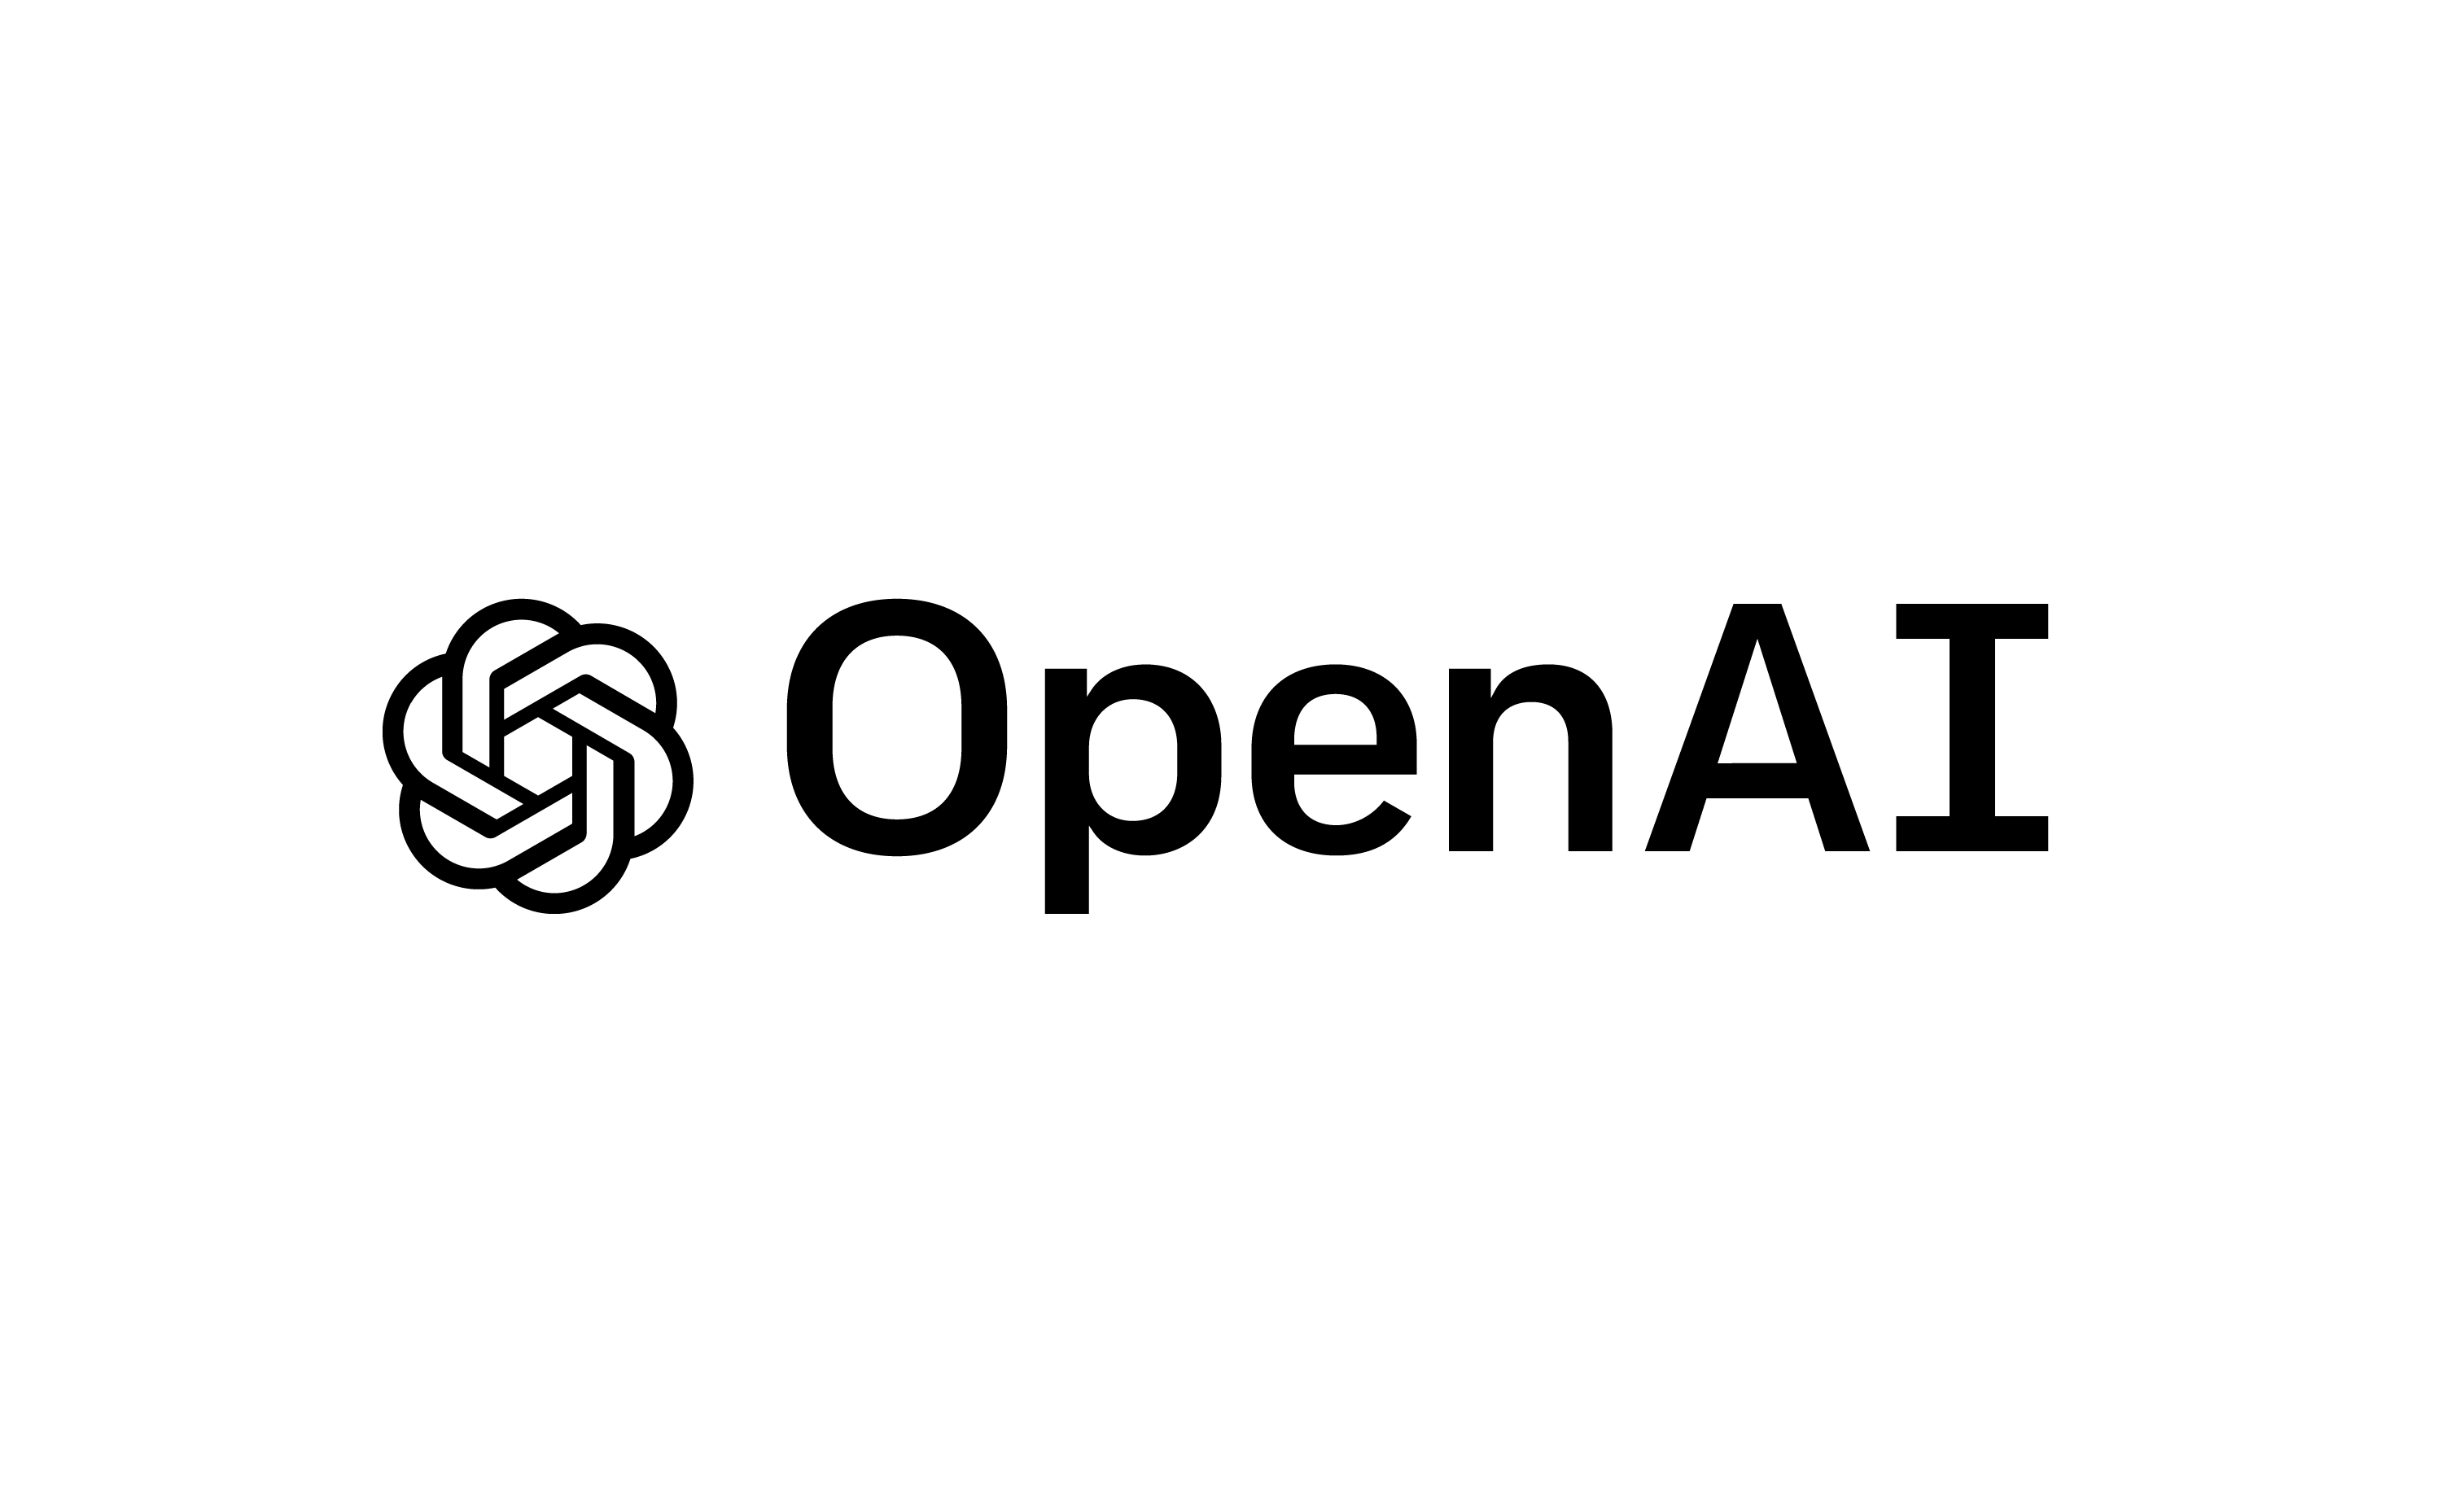 

#**This Notebook Shows How to use Agents to Interact with Pandas DataFrame**

#**In LangChain, the Agent can access many dataframes at once**

#**Step 01: Install All the Required Packages**

In [1]:
#!pip install langchain
#!pip install watermark
#!pip install openai

#**Step 02: Import All The Required Libraries**

In [2]:
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
#from langchain.agents import create_pandas_dataframe_agent
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI

In [4]:
import pandas as pd

#**Step 03: Setup the Environment**


In [5]:
os.environ["OPENAI_API_KEY"] = "sk-bXb1pHpASDFAW87M8rDFzASDFbid9ASDFG4T3BlbkFJCUATRSDFKAJASDFOR4ocCCruyiOPYA"

#**Step 04: Visualize the Data**

In [7]:
#url = "https://raw.githubusercontent.com/sudarshan-koirala/Logistic-Regression-for-Titanic-Dataset/master/Train_Titanic.csv"
df=pd.read_csv(r'C:\Users\A3MAX SOFTWARE TECH\A VS CODE\1. OPEN AI\LANGCHAIN\Langchain Agents\titanic dataset.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#**Step 05: Single DataFrame Example**

#**Agent can interact with Single DataFrame**

In [8]:
llm=OpenAI()

c:\Users\A3MAX SOFTWARE TECH\AppData\Local\Programs\Python\Python39\lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


In [9]:
agent=create_pandas_dataframe_agent(llm, df, verbose=True)

In [10]:
agent.run("How many rows are there")

c:\Users\A3MAX SOFTWARE TECH\AppData\Local\Programs\Python\Python39\lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: I need to count the number of rows in the dataframe
Action: python_repl_ast
Action Input: len(df)891891 is the number of rows in the dataframe
Final Answer: 891

> Finished chain.


'891'

In [11]:
agent.run("How many people have more than 3 siblings")



> Entering new AgentExecutor chain...
Thought: I need to find the column that holds the number of siblings and use a conditional statement to count the number of people with more than 3 siblings.
Action: python_repl_ast
Action Input: df[df['SibSp'] > 3]     PassengerId  Survived  Pclass                                     Name  \
16            17         0       3                     Rice, Master. Eugene   
50            51         0       3               Panula, Master. Juha Niilo   
59            60         0       3       Goodwin, Master. William Frederick   
68            69         1       3          Andersson, Miss. Erna Alexandra   
71            72         0       3               Goodwin, Miss. Lillian Amy   
119          120         0       3        Andersson, Miss. Ellis Anna Maria   
159          160         0       3               Sage, Master. Thomas Henry   
164          165         0       3             Panula, Master. Eino Viljami   
171          172         0       3

'30'

#**Step 06: Multi DataFrame Example**

#**Agent can also interact with Multiple DataFrames passed in a list**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df1=df.copy()

In [14]:
df1["Age"] = df1["Age"].fillna(df1["Age"].mean())

In [15]:
agent=create_pandas_dataframe_agent(llm, [df, df1], verbose=True)

In [16]:
agent.run("How many rows in the age column are different")



> Entering new AgentExecutor chain...
Thought: We can use the `value_counts()` function to count the unique values in the age column, and then subtract one to remove the NaN value.
Action: python_repl_ast
Action Input: df["Age"].value_counts().shape[0]-1NameError: name 'df' is not definedWe need to specify which dataframe we are working with.
Action: python_repl_ast
Action Input: df1["Age"].value_counts().shape[0]-18787 rows in the age column are different.
Final Answer: 87

> Finished chain.


'87'

In [17]:
df2=df1.copy()

In [18]:
df2["Age_Multiplied"]=df1["Age"] * 2

In [19]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Multiplied
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0


In [20]:
agent=create_pandas_dataframe_agent(llm, [df,df1, df2], verbose=True)

In [21]:
agent.run("Are the number of columns same in all the dataframe")



> Entering new AgentExecutor chain...
Thought: I need to compare the number of columns in each dataframe
Action: python_repl_ast
Action Input: df1.shape[1], df2.shape[1], df3.shape[1](12, 12, 13)I need to compare the values in this output
Action: python_repl_ast
Action Input: df1.shape[1] == df2.shape[1] == df3.shape[1]FalseI need to find out which dataframe has a different number of columns
Action: python_repl_ast
Action Input: df1.shape[1] != df2.shape[1] and df1.shape[1] != df3.shape[1] and df2.shape[1] != df3.shape[1]FalseI now know the final answer
Final Answer: Dataframe df3 has a different number of columns

> Finished chain.


'Dataframe df3 has a different number of columns'

#LANGCHAIN, PANDAS, AGENT